Data Set: Fire Incidents in City of Pittsburgh  https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

Using the number of fires weighted by the response as indicated by the alarm type of the fire we can find the neighborhoods that have the most fires and the associated danger and disruption.

In [ ]:
!pip install --upgrade geopandas

In [101]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
fires=pd.read_csv(r"fires/fireincidents.csv")
fires=fires[pd.isna(fires['neighborhood'])==False]
fires['neighborhood'].replace("Mount Oliver Borough","Mt. Oliver",inplace=True)

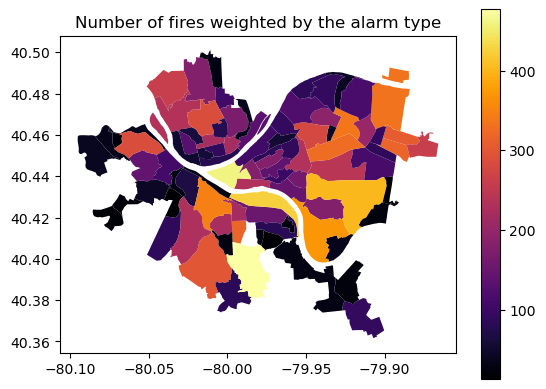

In [103]:
neighborhoods=gpd.read_file(r"neighborhoods/Neighborhoods_.shp")
weighted_fires=pd.DataFrame({'hood':fires['neighborhood'].unique()})
weighted_fires['weighted_fires'] = weighted_fires['hood'].apply(
    lambda nb:sum( fires[fires['neighborhood']==nb]["alarms"]+1)
)
fire_map = neighborhoods.merge(weighted_fires)
fire_map.plot(
    column='weighted_fires', legend=True,cmap="inferno",missing_kwds={"color": "tgrey"})
plt.title("Number of fires weighted by the alarm type");

<Axes: xlabel='hood'>

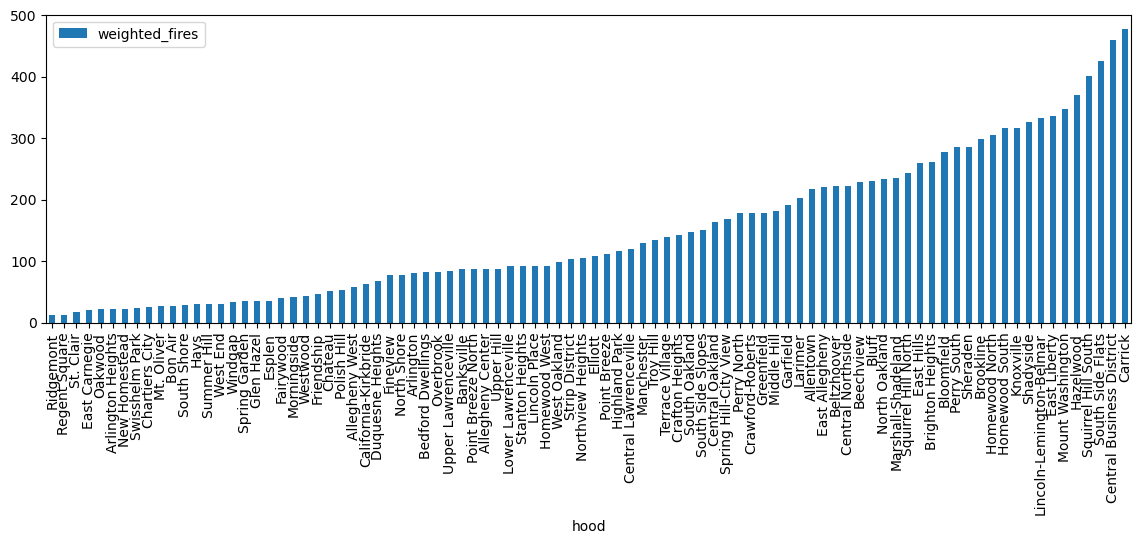

In [116]:
weighted_fires.sort_values("weighted_fires").plot(kind='bar',x='hood',figsize=(14,4));

Based on minimizing fire disruption, Ridgemont is the best neighborhood